In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier


plt.style.use('ggplot')

In [5]:
adresa = r'..\dataset\podaci_za_klasifikaciju\SMOTE'

In [6]:
def pripremi_podatke(adresa):
    X_train = pd.read_csv(f'{adresa}\X_resampled.csv')
    y_train = pd.read_csv(f'{adresa}\y_resampled.csv')
    X_test = pd.read_csv(f'{adresa}\X_test.csv')
    y_test = pd.read_csv(f'{adresa}\y_test.csv')
    return (X_train, X_test, y_train, y_test)

In [7]:
X_train, X_test, y_train, y_test = pripremi_podatke(adresa)
feature_names = X_train.columns

In [8]:
X_train

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,...,On_base_pct,Slugging_pct,Fielding_ave,Catcher,Designated_hitter,First_base,Outfield,Second_base,Shortstop,Third_base
0,-0.803653,-0.233679,-0.033919,-0.445957,0.050408,-0.428081,0.186375,-0.631676,-0.231155,-0.866172,...,-0.555748,-0.375186,1.054496,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000
1,3.312272,4.316313,4.573471,4.132759,4.680752,4.674348,2.097414,0.767998,2.092011,3.847272,...,1.234305,0.387493,0.974323,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000
2,-0.803653,-0.096211,0.146113,0.100474,-0.031999,-0.144135,0.236012,-0.775760,-0.675001,0.042237,...,-0.373709,-1.038384,-1.310611,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
3,-0.803653,-0.067169,0.083222,0.240447,0.112602,0.518406,-0.558186,-0.055340,-0.158117,-0.129161,...,0.111729,0.221693,0.733803,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000
4,-1.120262,-0.611232,-0.574496,-1.021997,-0.747230,-0.686214,-0.806373,-0.045048,-0.545780,-0.931303,...,-1.921043,-0.590725,0.613544,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,1.423127,1.558610,1.810209,2.781197,1.571996,0.898010,3.322159,-0.322623,0.447331,1.799234,...,0.549702,-0.217708,-0.857837,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000
2729,1.996076,2.007746,2.204834,2.292632,2.632997,2.432945,3.309630,-0.501263,1.407640,0.845746,...,1.131365,0.710686,-0.045878,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000
2730,1.030735,1.188522,1.354469,1.599356,1.651038,2.014016,2.553620,1.003472,1.997338,0.771580,...,1.196310,1.725164,0.599483,0.0,0.0,0.603077,0.396923,0.0,0.000000,0.000000
2731,0.420766,0.892489,0.938757,0.488880,0.750930,0.621181,1.582809,-0.513194,0.672480,-0.090332,...,-0.714190,-0.417762,-1.198146,0.0,0.0,0.000000,0.000000,0.0,0.867284,0.132716


In [9]:
y_train

,Hall_of_Fame
0,0
1,0
2,0
3,0
4,0
...,...
2728,2
2729,2
2730,2
2731,2


In [49]:
# !pip install termcolor
# !pip install imblearn
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '1', '2'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")


In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
     
def auc_curve_plot(X_train, X_test, y_train, y_test, model):
    classifier_ovr = OneVsRestClassifier(model)
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    classifier_ovr.fit(X_train, y_train_bin)
    y_scores = classifier_ovr.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for class_label in range(3):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, class_label], y_scores[:, class_label])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

    plt.figure(figsize=(5, 5))
    colors = ['red', 'blue', 'green']
    classes = ['0 vs ostale', '1 vs ostale', '2 vs ostale']
    for class_label, color, class_name in zip(range(3), colors, classes):
        plt.plot(fpr[class_label], tpr[class_label], color=color, lw=2, label=f'{class_name} (AUC = {roc_auc[class_label]:.2f})')

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-Rest AUC Curve')
    plt.legend(loc='lower right')

    plt.show()

In [50]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test, model):
    model.fit(X_train, Y_train.values.ravel())
    report_imbalanced(model, X_train, Y_train, "training")
    report_imbalanced(model, X_test, Y_test, "test")
    auc_curve_plot(X_train, X_test, Y_train, Y_test, model)
    return model

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99       769
          1       1.00      1.00      1.00      1.00      1.00      1.00       910
          2       0.99      1.00      1.00      1.00      1.00      1.00       905

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      2584

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  759    2    8
1    0  910    0
2    0    0  905
---------------------------------------------------------------------------------
Classification report for model KNeighborsClassifi

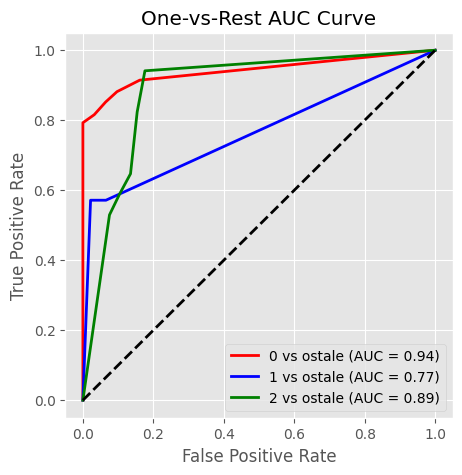

In [52]:
model_knn_SMOTE = train_and_evaluate_model(X_train, y_train, X_test, y_test, knn) # treninranje modela

In [53]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

#estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6)
estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.991 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.995 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 6/6] END n_neigh

[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.981 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.984 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.984 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=uniform;, score=0.970 total time=   0.0

[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.984 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=2, weights=uniform;, score=0.988 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=2, weights=uniform;, score=0.970 total time=   0.0

[CV 4/6] END n_neighbors=30, p=2, weights=uniform;, score=0.979 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=2, weights=uniform;, score=0.974 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=2, weights=uniform;, score=0.984 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=distance;, score=0.984 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=distance;, score=0.958 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=distance;, score=0.974 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=2, weights=distance;, score=0.981 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=2, weights=distance;, score=0.981 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=2, weights=distance;, score=0.986 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=1, weights=uniform;, score=0.979 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=1, weights=uniform;, score=0.977 total time=   0.0

[CV 4/6] END n_neighbors=10, p=2, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 4/6] END n_neighbors=15, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=1, weights=distance;, score=0.998 total time=   0.0

[CV 4/6] END n_neighbors=35, p=1, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=1, weights=uniform;, score=0.984 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=1, weights=uniform;, score=0.965 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=2, weights=uniform;, score=0.988 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=2, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=2, weights=uniform;, score=0.979 total time=   0.0

[CV 2/6] END n_neighbors=15, p=2, weights=uniform;, score=0.968 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=15, p=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=2, weights=uniform;, score=0.988 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=2, weights=distance;, score=0.947 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=2, weights=distance;, score=0.970 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=2, weights=distance;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=15, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 1/6] END n_neighbors=20, p=1, weights=uniform;, score=0.947 total time=   0.0

[CV 1/6] END n_neighbors=40, p=1, weights=uniform;, score=0.923 total time=   0.0s
[CV 2/6] END n_neighbors=40, p=1, weights=uniform;, score=0.968 total time=   0.0s
[CV 3/6] END n_neighbors=40, p=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/6] END n_neighbors=40, p=1, weights=uniform;, score=0.947 total time=   0.0s
[CV 5/6] END n_neighbors=40, p=1, weights=uniform;, score=0.942 total time=   0.0s
[CV 6/6] END n_neighbors=40, p=1, weights=uniform;, score=0.916 total time=   0.0s
[CV 1/6] END n_neighbors=40, p=1, weights=distance;, score=0.937 total time=   0.0s
[CV 2/6] END n_neighbors=40, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 3/6] END n_neighbors=40, p=1, weights=distance;, score=0.974 total time=   0.0s
[CV 4/6] END n_neighbors=40, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 5/6] END n_neighbors=40, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 6/6] END n_neighbors=40, p=1, weights=distance;, score=0.993 total time=   0.0

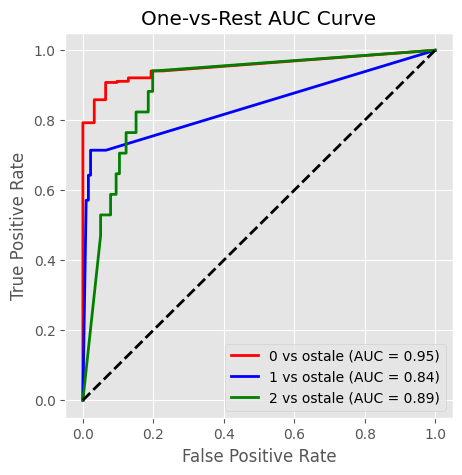

In [54]:
model_knn_GSCV_SMOTE = train_and_evaluate_model(X_train, y_train, X_test, y_test, estimator)

In [55]:
estimator.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [56]:
estimator.best_score_

0.9907129624633537

In [57]:
estimator.cv_results_

{'mean_fit_time': array([0.00207953, 0.00232732, 0.00232697, 0.0020798 , 0.00199461,
        0.00191363, 0.00182939, 0.00199469, 0.00249378, 0.00199497,
        0.00182903, 0.00241204, 0.00232712, 0.00249366, 0.00216099,
        0.00199521, 0.00224547, 0.00199453, 0.00216118, 0.00199497,
        0.00166233, 0.00182811, 0.00182867, 0.00199493, 0.00191295,
        0.0016621 , 0.00216107, 0.00216087, 0.00182863, 0.00199477,
        0.00199477, 0.00216115]),
 'std_fit_time': array([1.89666758e-04, 4.69853738e-04, 4.70106001e-04, 1.90077267e-04,
        5.75656660e-04, 4.49711704e-04, 3.72119570e-04, 2.97360213e-07,
        4.99010668e-04, 7.38071427e-07, 3.72064848e-04, 4.47745636e-04,
        4.69740807e-04, 4.99050531e-04, 3.71922423e-04, 5.76551762e-04,
        6.90772187e-04, 4.89903609e-07, 3.71514157e-04, 4.71843961e-07,
        4.70162197e-04, 3.72082593e-04, 3.71798059e-04, 7.37000982e-07,
        1.82380434e-04, 4.70246498e-04, 3.71993511e-04, 3.71442696e-04,
        6.85737115e-0

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.98       769
          1       1.00      1.00      1.00      1.00      1.00      1.00       910
          2       0.99      1.00      0.99      1.00      1.00      1.00       905

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      2584

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  758    2    9
1    0  910    0
2    0    0  905
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on tes

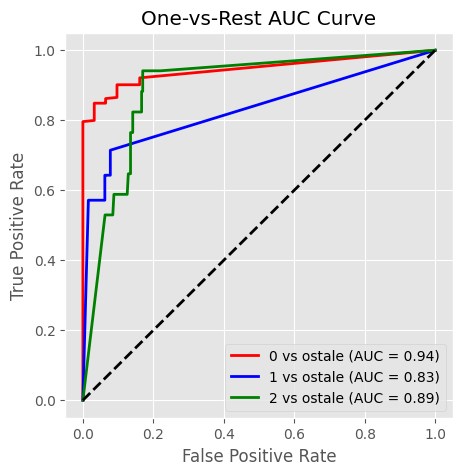

In [58]:
from sklearn.ensemble import BaggingClassifier

baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
model_baggingKnn_SMOTE = train_and_evaluate_model(X_train, y_train, X_test, y_test, baggingKnn)

In [59]:
adresa = r'..\dataset\podaci_za_klasifikaciju\SMOTENN'

In [60]:
X_train, X_test, y_train, y_test = pripremi_podatke(adresa)
feature_names = X_train.columns

In [61]:
X_train

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,...,On_base_pct,Slugging_pct,Fielding_ave,Catcher,Designated_hitter,First_base,Outfield,Second_base,Shortstop,Third_base
0,-0.803653,-0.233679,-0.033919,-0.445957,0.050408,-0.428081,0.186375,-0.631676,-0.231155,-0.866172,...,-0.555748,-0.375186,1.054496,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0
1,-0.803653,-0.096211,0.146113,0.100474,-0.031999,-0.144135,0.236012,-0.775760,-0.675001,0.042237,...,-0.373709,-1.038384,-1.310611,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
2,-0.803653,-0.067169,0.083222,0.240447,0.112602,0.518406,-0.558186,-0.055340,-0.158117,-0.129161,...,0.111729,0.221693,0.733803,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
3,-1.120262,-0.611232,-0.574496,-1.021997,-0.747230,-0.686214,-0.806373,-0.045048,-0.545780,-0.931303,...,-1.921043,-0.590725,0.613544,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.487043,-0.698359,-0.729564,-0.537477,-0.675707,-0.514126,-0.558186,-0.683135,-0.790176,-0.519948,...,0.020710,-0.507825,0.653630,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,2.962810,1.920201,1.940803,1.306941,1.729783,1.728384,1.730327,-0.348331,1.207078,0.930403,...,-0.086864,-0.289497,-0.517771,0.000000,0.0,0.000000,0.000000,0.350627,0.649373,0.0
2580,-0.180946,0.289222,0.516235,0.878136,0.793292,0.573142,2.808916,-0.381258,0.512940,0.533888,...,1.606443,0.993730,-0.753549,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
2581,1.754103,0.944819,1.456467,2.217041,1.689180,1.842693,2.083415,-0.345491,1.332285,0.232719,...,0.581132,0.550330,-2.621430,0.000000,0.0,0.000000,0.921422,0.000000,0.078578,0.0
2582,1.286945,0.608625,0.390922,0.271837,0.435528,0.619780,0.198670,-0.623189,0.308832,1.157558,...,1.457327,-0.171175,0.741451,0.603077,0.0,0.396923,0.000000,0.000000,0.000000,0.0


In [62]:
y_train

,Hall_of_Fame
0,0
1,0
2,0
3,0
4,0
...,...
2579,2
2580,2
2581,2
2582,2


Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99       769
          1       1.00      1.00      1.00      1.00      1.00      1.00       910
          2       0.99      1.00      1.00      1.00      1.00      1.00       905

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      2584

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  759    2    8
1    0  910    0
2    0    0  905
---------------------------------------------------------------------------------
Classification report for model KNeighborsClassifi

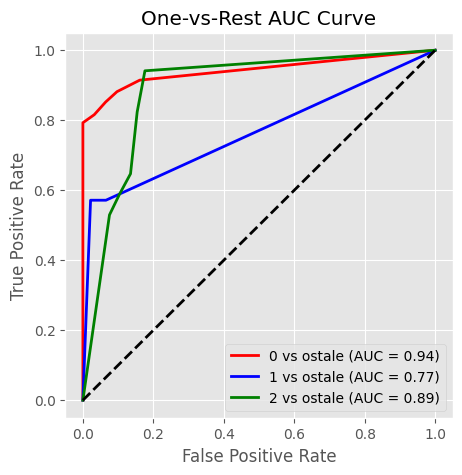

In [63]:
model_knn_SMOTENN = train_and_evaluate_model(X_train, y_train, X_test, y_test, knn) # treninranje modela

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.991 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.995 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 6/6] END n_neigh

[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.984 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.984 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=2, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=2, weights=uniform;, score=0.972 total time=   0.0

[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=2, weights=uniform;, score=0.988 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=2, weights=uniform;, score=0.984 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=2, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=2, weights=uniform;, score=0.979 total time=   0.0

[CV 5/6] END n_neighbors=30, p=2, weights=uniform;, score=0.974 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=2, weights=uniform;, score=0.984 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=distance;, score=0.984 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=distance;, score=0.958 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=distance;, score=0.974 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=2, weights=distance;, score=0.981 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=2, weights=distance;, score=0.981 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=2, weights=distance;, score=0.986 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=1, weights=uniform;, score=0.979 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=1, weights=uniform;, score=0.974 total time=   0.0

[CV 3/6] END n_neighbors=10, p=2, weights=distance;, score=0.995 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=2, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 4/6] END n_neighbors=15, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=1, weights=uniform;, score=0.998 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=1, weights=uniform;, score=0.993 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=1, weights=distance;, score=0.995 total time=   0.0

[CV 2/6] END n_neighbors=35, p=1, weights=uniform;, score=0.981 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=1, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=1, weights=uniform;, score=0.984 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=1, weights=uniform;, score=0.965 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=1, weights=distance;, score=0.995 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=2, weights=uniform;, score=0.988 total time=   0.0

[CV 4/6] END n_neighbors=15, p=1, weights=distance;, score=0.998 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=2, weights=uniform;, score=0.940 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=2, weights=uniform;, score=0.968 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=2, weights=uniform;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=15, p=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/6] END n_neighbors=15, p=2, weights=uniform;, score=0.995 total time=   0.0s
[CV 6/6] END n_neighbors=15, p=2, weights=uniform;, score=0.988 total time=   0.0s
[CV 1/6] END n_neighbors=15, p=2, weights=distance;, score=0.947 total time=   0.0s
[CV 2/6] END n_neighbors=15, p=2, weights=distance;, score=0.970 total time=   0.0s
[CV 3/6] END n_neighbors=15, p=2, weights=distance;, score=0.970 total time=   0.0

[CV 2/6] END n_neighbors=35, p=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=2, weights=uniform;, score=0.963 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=2, weights=uniform;, score=0.960 total time=   0.0s
[CV 1/6] END n_neighbors=35, p=2, weights=distance;, score=0.923 total time=   0.0s
[CV 2/6] END n_neighbors=35, p=2, weights=distance;, score=0.961 total time=   0.0s
[CV 3/6] END n_neighbors=35, p=2, weights=distance;, score=0.963 total time=   0.0s
[CV 4/6] END n_neighbors=35, p=2, weights=distance;, score=0.993 total time=   0.0s
[CV 5/6] END n_neighbors=35, p=2, weights=distance;, score=0.995 total time=   0.0s
[CV 6/6] END n_neighbors=35, p=2, weights=distance;, score=0.998 total time=   0.0s
[CV 1/6] END n_neighbors=40, p=1, weights=uniform;, score=0.923 total time=   0.0

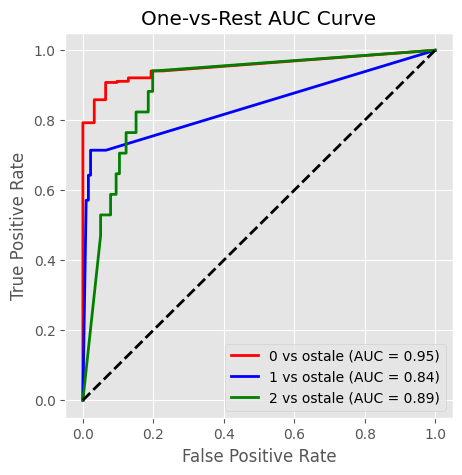

In [64]:
model_knn_GSCV_SMOTENN = train_and_evaluate_model(X_train, y_train, X_test, y_test, estimator)

In [65]:
estimator.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [66]:
estimator.best_score_

0.9907129624633537

In [67]:
estimator.cv_results_

{'mean_fit_time': array([0.00182954, 0.00182712, 0.00199461, 0.00199485, 0.00149643,
        0.00216103, 0.00199473, 0.00199413, 0.00182839, 0.00216087,
        0.00224674, 0.00216118, 0.00199461, 0.00182831, 0.00216099,
        0.00232704, 0.0023274 , 0.00199461, 0.00216091, 0.00249322,
        0.0024933 , 0.00249338, 0.00199469, 0.00207937, 0.00224618,
        0.00199473, 0.00166202, 0.00182863, 0.00216115, 0.00216067,
        0.00166225, 0.00182899]),
 'std_fit_time': array([6.86826735e-04, 3.71227062e-04, 2.38418579e-07, 4.96307850e-07,
        4.99050101e-04, 3.71691583e-04, 2.66560075e-07, 4.56536821e-07,
        3.71567316e-04, 3.71549269e-04, 3.83435236e-04, 3.71727053e-04,
        5.75794328e-04, 3.71744742e-04, 3.72029495e-04, 4.70134066e-04,
        4.69965645e-04, 3.89335909e-07, 3.71638174e-04, 7.61678215e-04,
        4.98613355e-04, 7.61522191e-04, 3.55413433e-07, 1.89844215e-04,
        3.82568283e-04, 5.75863293e-04, 4.69937494e-04, 3.71887294e-04,
        3.71425150e-0

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99       769
          1       1.00      1.00      1.00      1.00      1.00      1.00       910
          2       0.99      1.00      1.00      1.00      1.00      1.00       905

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      2584

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  760    1    8
1    0  910    0
2    0    0  905
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on tes

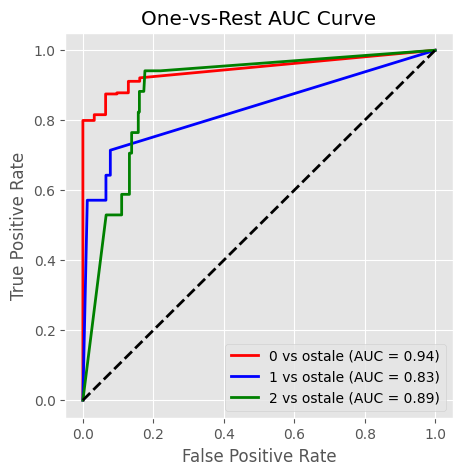

In [68]:
model_baggingKnn_SMOTENN = train_and_evaluate_model(X_train, y_train, X_test, y_test, baggingKnn)

In [69]:
import pickle

models = [model_knn_SMOTE, model_knn_GSCV_Smote, model_baggingKnn_SMOTE, 
         model_knn_SMOTENN, model_knn_GSCV_SMOTENN, model_baggingKnn_SMOTENN]

model_names = ["model_knn_SMOTE", "model_knn_GSCV_Smote", "model_baggingKnn_SMOTE", 
         "model_knn_SMOTENN", "model_knn_GSCV_SMOTENN", "model_baggingKnn_SMOTENN"]


for model, modelname in zip(models, model_names):
    with open(f'Sačuvani modeli za k najblizih suseda/{modelname}.pkl', 'wb') as file:  
        pickle.dump(model, file)